In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-1.9292104151419807 98.66691635549915
-32.02854206638089 62.641278905228745
-57.652938535096034 91.87323775306362
33.271439113902574 -56.96022077824519
-3.7180031587719213 26.479436487027442
41.735157044867634 163.09697840914117
-58.055028024075156 49.41139514369377
6.842857455205319 31.04622622811891
1.0311168046338395 -105.7221100658665
84.99489056410991 32.19227821252224
8.705447481256826 25.339795526480458
1.9182766804232898 -67.17283043426556
67.68370642317083 -36.72872609937207
44.54229818172118 -25.592777271772945
33.03734137263665 -37.34520659381718
20.759596162775054 127.98697963844012
-55.752910077915786 90.00830131452472
70.12843639574061 -18.58044318037878
71.78060619877257 72.52309490121746
55.2368388632317 -99.36033811960904
17.970204081693424 41.20405116471585
23.30552367996006 -55.10302995850836
-30.778782535645554 113.00794762626674
-6.604067699730436 36.98383173903437
-61.44701722777015 -42.71189721891588
-36.04579320569747 -103.72252900696716
-80.30809502238466 129.5

In [14]:
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [17]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1694f71f2342f948a53b682819cf81fd


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | padang
Processing Record 2 of Set 13 | souillac
Processing Record 3 of Set 13 | busselton
Processing Record 4 of Set 13 | saint george
Processing Record 5 of Set 13 | kampene
Processing Record 6 of Set 13 | severo-kurilsk
Processing Record 7 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 8 of Set 13 | yirol
City not found. Skipping...
Processing Record 9 of Set 13 | puerto ayora
Processing Record 10 of Set 13 | berlevag
Processing Record 11 of Set 13 | raga
Processing Record 12 of Set 13 | sao gabriel da cachoeira
Processing Record 13 of Set 13 | tasiilaq
Processing Record 14 of Set 13 | lagoa
Processing Record 15 of Set 13 | ribeira grande
Processing Record 16 of Set 13 | hirara
Processing Record 17 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 13 | yar-sale
Processing Record 19 of Set 13 | thompson
Processing Record 20 of Set 13 | abha

Processing Record 33 of Set 16 | colares
Processing Record 34 of Set 16 | vila velha
Processing Record 35 of Set 16 | kaitangata
Processing Record 36 of Set 16 | attawapiskat
City not found. Skipping...
Processing Record 37 of Set 16 | marolambo
Processing Record 38 of Set 16 | nurota
Processing Record 39 of Set 16 | georgetown
Processing Record 40 of Set 16 | lasa
Processing Record 41 of Set 16 | jalu
Processing Record 42 of Set 16 | longyearbyen
Processing Record 43 of Set 16 | bellingham
Processing Record 44 of Set 16 | esso
Processing Record 45 of Set 16 | bousso
Processing Record 46 of Set 16 | yellowknife
Processing Record 47 of Set 16 | marovoay
Processing Record 48 of Set 16 | mgandu
Processing Record 49 of Set 16 | verkhoyansk
Processing Record 50 of Set 16 | butaritari
Processing Record 1 of Set 17 | mansa
Processing Record 2 of Set 17 | san isidro
Processing Record 3 of Set 17 | marawi
Processing Record 4 of Set 17 | angoche
Processing Record 5 of Set 17 | toliary
City not f

Processing Record 19 of Set 20 | samalaeulu
City not found. Skipping...
Processing Record 20 of Set 20 | coahuayana
Processing Record 21 of Set 20 | malabo
Processing Record 22 of Set 20 | litoral del san juan
City not found. Skipping...
Processing Record 23 of Set 20 | sistranda
Processing Record 24 of Set 20 | taltal
Processing Record 25 of Set 20 | limbang
Processing Record 26 of Set 20 | dingle
Processing Record 27 of Set 20 | morehead
Processing Record 28 of Set 20 | goose creek
Processing Record 29 of Set 20 | mezen
Processing Record 30 of Set 20 | fairbanks
Processing Record 31 of Set 20 | verkh-usugli
Processing Record 32 of Set 20 | zakharovo
Processing Record 33 of Set 20 | magui
City not found. Skipping...
Processing Record 34 of Set 20 | opuwo
Processing Record 35 of Set 20 | khani
Processing Record 36 of Set 20 | noshiro
Processing Record 37 of Set 20 | meulaboh
Processing Record 38 of Set 20 | mayo
Processing Record 39 of Set 20 | kavieng
Processing Record 40 of Set 20 | 

Processing Record 3 of Set 24 | phuntsholing
Processing Record 4 of Set 24 | lookan
Processing Record 5 of Set 24 | inirida
Processing Record 6 of Set 24 | coos bay
Processing Record 7 of Set 24 | henties bay
Processing Record 8 of Set 24 | montauban
Processing Record 9 of Set 24 | tres lagoas
Processing Record 10 of Set 24 | rantoul
Processing Record 11 of Set 24 | guozhen
Processing Record 12 of Set 24 | saint petersburg
Processing Record 13 of Set 24 | filingue
Processing Record 14 of Set 24 | gari
Processing Record 15 of Set 24 | jiddah
City not found. Skipping...
Processing Record 16 of Set 24 | ondorhaan
City not found. Skipping...
Processing Record 17 of Set 24 | teknaf
Processing Record 18 of Set 24 | flinders
Processing Record 19 of Set 24 | mandalgovi
Processing Record 20 of Set 24 | japura
Processing Record 21 of Set 24 | wagar
Processing Record 22 of Set 24 | morant bay
Processing Record 23 of Set 24 | la paz
Processing Record 24 of Set 24 | juifang
City not found. Skipping

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Padang,-0.9492,100.3543,71.65,80,91,3.62,ID,2022-05-23 00:08:58
1,Souillac,-20.5167,57.5167,72.43,71,3,10.47,MU,2022-05-23 00:08:58
2,Busselton,-33.6500,115.3333,60.91,71,84,20.69,AU,2022-05-23 00:08:58
3,Saint George,37.1041,-113.5841,85.95,10,0,10.36,US,2022-05-23 00:08:58
4,Kampene,-3.6000,26.6667,67.87,99,90,2.13,CD,2022-05-23 00:08:59
5,Severo-Kurilsk,50.6789,156.1250,41.09,97,100,16.33,RU,2022-05-23 00:08:59
6,Puerto Ayora,-0.7393,-90.3518,72.75,87,67,8.01,EC,2022-05-23 00:08:59
7,Berlevag,70.8578,29.0864,39.15,81,100,1.14,NO,2022-05-23 00:04:28
8,Raga,8.4596,25.6780,76.84,64,94,2.53,SS,2022-05-23 00:08:59
9,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,71.22,97,59,0.87,BR,2022-05-23 00:09:00


In [21]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]

In [23]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Padang,ID,2022-05-23 00:08:58,-0.9492,100.3543,71.65,80,91,3.62
1,Souillac,MU,2022-05-23 00:08:58,-20.5167,57.5167,72.43,71,3,10.47
2,Busselton,AU,2022-05-23 00:08:58,-33.6500,115.3333,60.91,71,84,20.69
3,Saint George,US,2022-05-23 00:08:58,37.1041,-113.5841,85.95,10,0,10.36
4,Kampene,CD,2022-05-23 00:08:59,-3.6000,26.6667,67.87,99,90,2.13
...,...,...,...,...,...,...,...,...,...
563,Pontes E Lacerda,BR,2022-05-23 00:11:22,-15.2261,-59.3353,69.66,66,37,2.13
564,Mogadishu,SO,2022-05-23 00:11:22,2.0371,45.3438,80.15,88,100,19.71
565,Partizansk,RU,2022-05-23 00:11:22,43.1258,133.1339,68.86,42,10,0.65
566,Shagonar,RU,2022-05-23 00:11:23,51.5333,92.8000,65.66,44,97,3.85


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1653265143.3287425

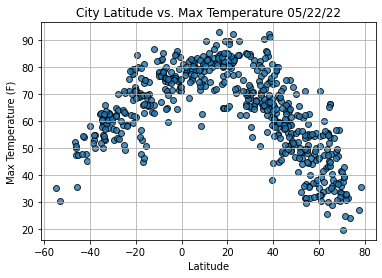

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

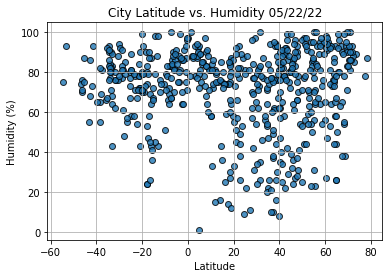

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

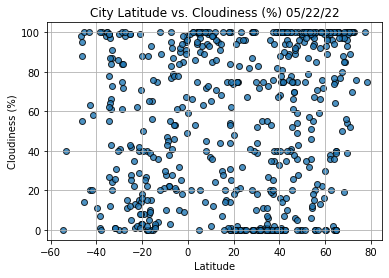

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

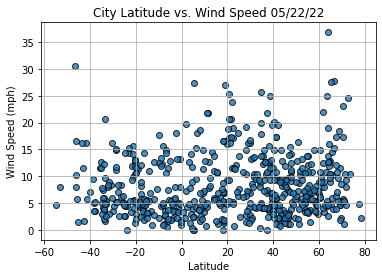

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Saint George,US,2022-05-23 00:08:58,37.1041,-113.5841,85.95,10,0,10.36
5,Severo-Kurilsk,RU,2022-05-23 00:08:59,50.6789,156.1250,41.09,97,100,16.33
7,Berlevag,NO,2022-05-23 00:04:28,70.8578,29.0864,39.15,81,100,1.14
8,Raga,SS,2022-05-23 00:08:59,8.4596,25.6780,76.84,64,94,2.53
10,Tasiilaq,GL,2022-05-23 00:09:00,65.6145,-37.6368,35.76,99,100,10.22


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

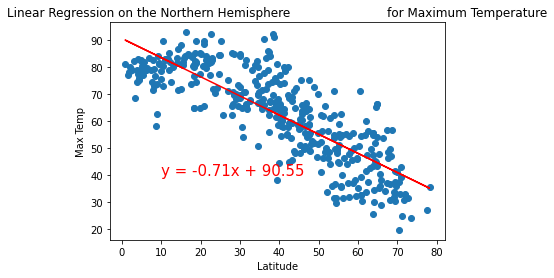

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

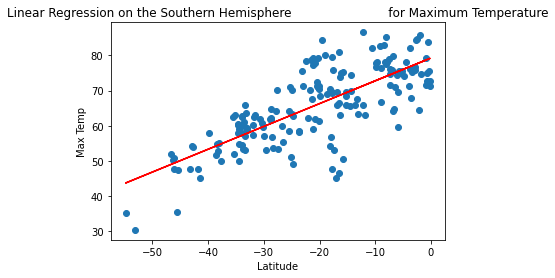

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

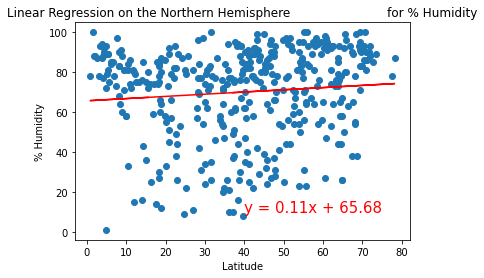

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

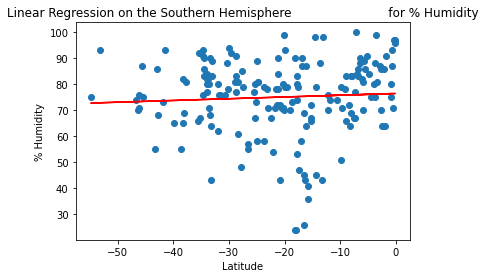

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

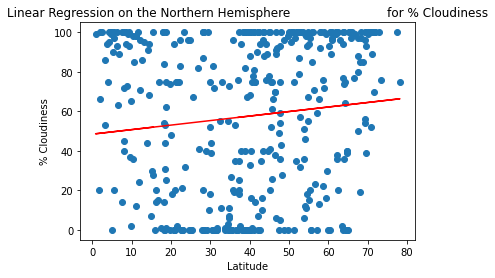

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

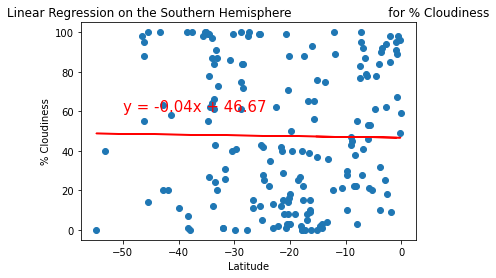

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

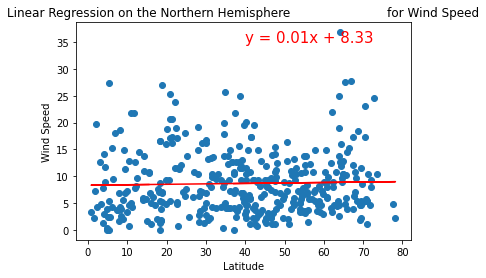

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

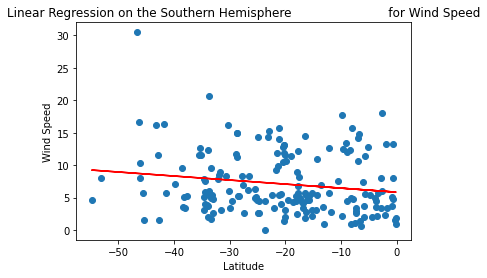

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))